In [1]:
# Install chardet if not already installed
!pip install chardet
import pandas as pd

# Detect encoding
import chardet
with open("customers.csv", 'rb') as f:
    result = chardet.detect(f.read())
print(f"Detected Encoding: {result['encoding']}")

# Load the dataset with the detected encoding
data = pd.read_csv("customers.csv", encoding=result['encoding'])

Detected Encoding: utf-8


   customer_id          name  age gender       city   join_date  recency  \
0       570586   Falak Kanda   37      M   Guwahati  2023-04-13      1.0   
1       294484  Meera Parekh   36      M    Kolkata  2023-06-25      7.0   
2       669686    Manya Chad   44      M    Kolkata  2022-05-09     37.0   
3       607103   Fitan Desai   18      F  Ahmedabad  2024-12-01      8.0   
4       633928  Hemal Pandey   37      M  Ahmedabad  2023-03-26      8.0   

   frequency  monetary                segment  
0        9.0   2777.92      At-Risk Customers  
1       10.0   9333.17  Hibernating Customers  
2        6.0   3243.52      At-Risk Customers  
3       12.0  10222.43       Regular Shoppers  
4        6.0   4519.36      At-Risk Customers  

Missing Values:
 customer_id    0
name           0
age            0
gender         0
city           0
join_date      0
recency        0
frequency      0
monetary       0
segment        0
dtype: int64

Summary Statistics:
          customer_id          ag

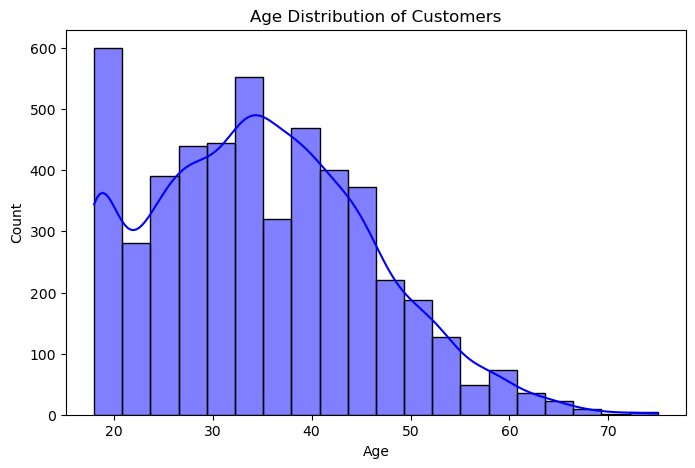

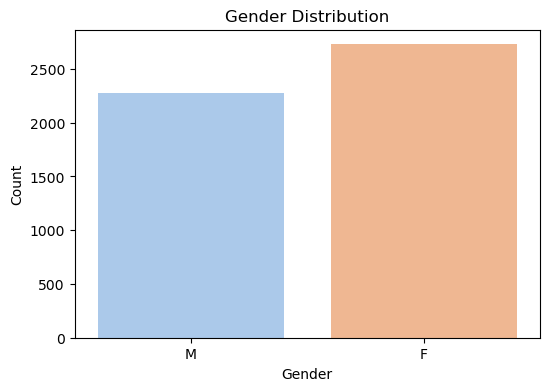

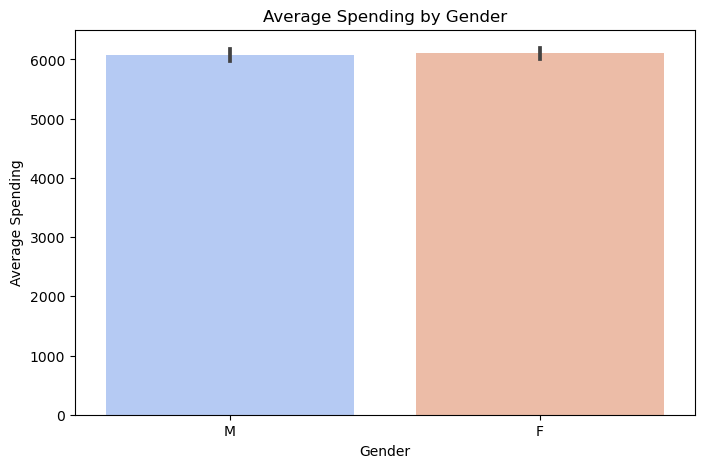

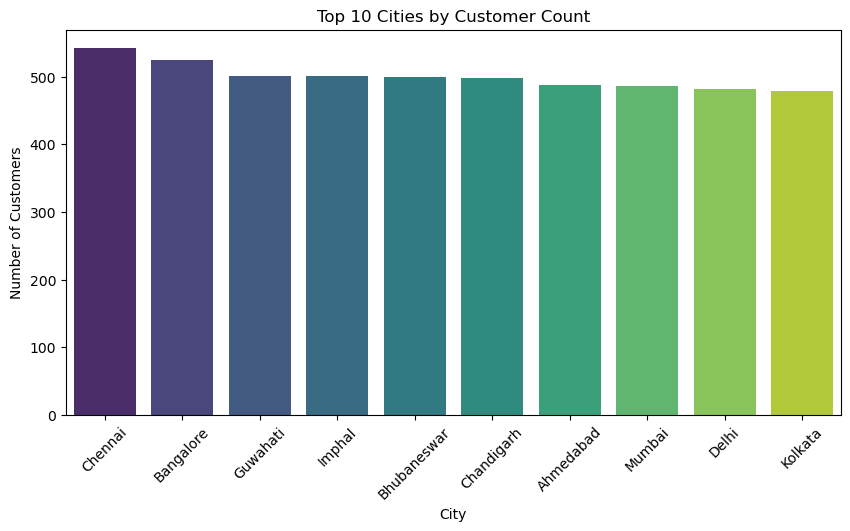

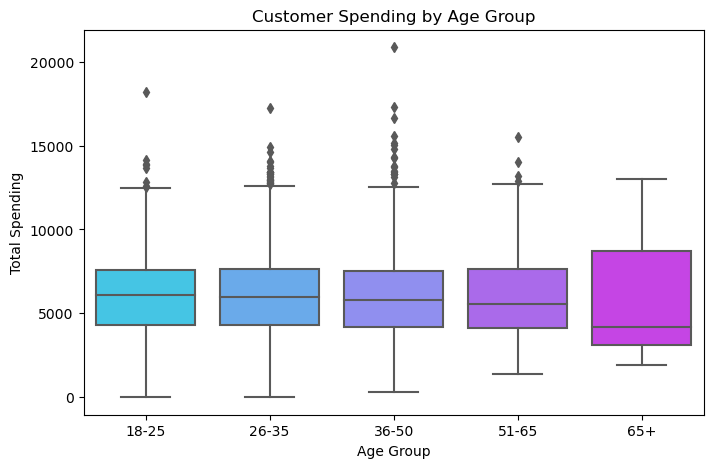

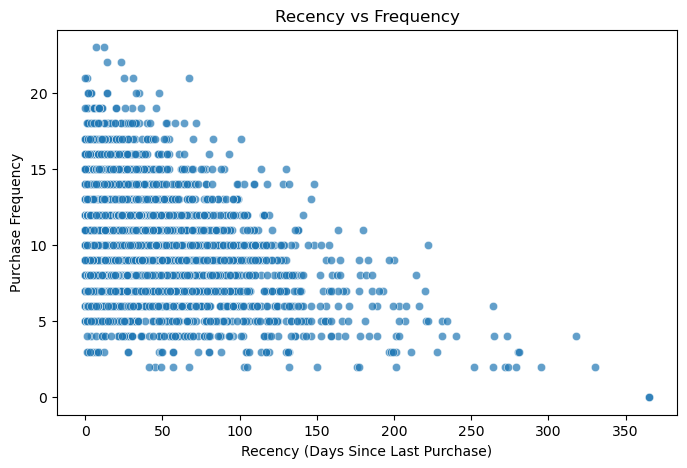

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load customer dataset
df = pd.read_csv("customers.csv", encoding="latin1")


# Display first few rows
print(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Distribution of Age
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Spending by Gender
plt.figure(figsize=(8,5))
sns.barplot(x='gender', y='monetary', data=df, palette='coolwarm')
plt.title("Average Spending by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Spending")
plt.show()

# Top Cities by Customer Count
top_cities = df['city'].value_counts().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Cities by Customer Count")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.show()

# Spending by Age Group
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 50, 65, 80], labels=['18-25', '26-35', '36-50', '51-65', '65+'])
plt.figure(figsize=(8,5))
sns.boxplot(x='age_group', y='monetary', data=df, palette='cool')
plt.title("Customer Spending by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Spending")
plt.show()

# Recency vs. Frequency Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['recency'], y=df['frequency'], alpha=0.7)
plt.title("Recency vs Frequency")
plt.xlabel("Recency (Days Since Last Purchase)")
plt.ylabel("Purchase Frequency")
plt.show()

In [3]:
import pandas as pd

# Load data with the correct encoding
try:
    df = pd.read_csv("customers.csv", encoding='utf-8')
except UnicodeDecodeError:
    # Try alternative encodings if UTF-8 fails
    try:
        df = pd.read_csv("customers.csv", encoding='latin1')
    except UnicodeDecodeError:
        df = pd.read_csv("customers.csv", encoding='ISO-8859-1')

# Task 1: RFM Analysis for Customer Value
def task1_label_customers(df):
    # Calculate RFM scores
    rfm = df[['customer_id', 'recency', 'frequency', 'monetary']].copy()

    # Normalize RFM values (higher = better)
    rfm['R_Score'] = (rfm['recency'].rank(ascending=False, pct=True)) * 100
    rfm['F_Score'] = (rfm['frequency'].rank(ascending=True, pct=True)) * 100
    rfm['M_Score'] = (rfm['monetary'].rank(ascending=True, pct=True)) * 100

    # Calculate composite RFM score
    rfm['RFM_Score'] = (rfm['R_Score'] * 0.2) + (rfm['F_Score'] * 0.3) + (rfm['M_Score'] * 0.5)

    # Label customers based on RFM score percentiles
    rfm['Customer_Label'] = pd.qcut(
        rfm['RFM_Score'],
        q=[0, 0.3, 0.7, 1],  # 30% Low, 40% Mid, 30% High
        labels=['Low', 'Mid', 'High']
    )

    # Merge labels back into the original dataframe
    df = df.merge(rfm[['customer_id', 'Customer_Label']], on='customer_id', how='left')
    return df

# Run Task 1
df_labeled = task1_label_customers(df)

# Display the labeled dataframe (this will display as a table in Jupyter or similar environment)
df_labeled



,customer_id,name,age,gender,city,join_date,recency,frequency,monetary,segment,Customer_Label
0,570586,Falak Kanda,37,M,Guwahati,2023-04-13,1.0,9.0,2777.92,At-Risk Customers,Low
1,294484,Meera Parekh,36,M,Kolkata,2023-06-25,7.0,10.0,9333.17,Hibernating Customers,High
2,669686,Manya Chad,44,M,Kolkata,2022-05-09,37.0,6.0,3243.52,At-Risk Customers,Low
3,607103,Fitan Desai,18,F,Ahmedabad,2024-12-01,8.0,12.0,10222.43,Regular Shoppers,High
4,633928,Hemal Pandey,37,M,Ahmedabad,2023-03-26,8.0,6.0,4519.36,At-Risk Customers,Low
...,...,...,...,...,...,...,...,...,...,...,...
4995,574543,Yochana Chokshi,27,M,Bangalore,2024-10-08,7.0,14.0,7654.31,Regular Shoppers,High
4996,819960,Chanakya Kunda,45,M,Guwahati,2021-11-19,39.0,11.0,6659.72,Hibernating Customers,Mid
4997,826341,Anusha Subramanian,42,F,Delhi,2020-12-29,39.0,7.0,3964.56,At-Risk Customers,Low
4998,585488,Abhiram Balay,30,M,Delhi,2024-08-25,12.0,13.0,10949.45,Regular Shoppers,High


In [4]:
import pandas as pd

# Load data with the correct encoding
try:
    df = pd.read_csv("customers.csv", encoding='utf-8')
except UnicodeDecodeError:
    # Try alternative encodings if UTF-8 fails
    try:
        df = pd.read_csv("customers.csv", encoding='latin1')
    except UnicodeDecodeError:
        df = pd.read_csv("customers.csv", encoding='ISO-8859-1')

# Task 1: RFM Analysis for Customer Value
def task1_most_valuable_customers(df):
    # Calculate RFM scores
    rfm = df[['customer_id', 'recency', 'frequency', 'monetary']].copy()

    # Normalize RFM values (higher = better)
    rfm['R_Score'] = (rfm['recency'].rank(ascending=False, pct=True)) * 100
    rfm['F_Score'] = (rfm['frequency'].rank(ascending=True, pct=True)) * 100
    rfm['M_Score'] = (rfm['monetary'].rank(ascending=True, pct=True)) * 100

    # Calculate composite RFM score
    rfm['RFM_Score'] = (rfm['R_Score'] * 0.2) + (rfm['F_Score'] * 0.3) + (rfm['M_Score'] * 0.5)

    # Rank customers
    top_customers = rfm.sort_values('RFM_Score', ascending=False).head(10)
    return top_customers

# Run Task 1
result_task1 = task1_most_valuable_customers(df)
print("Top 10 Most Valuable Customers:\n", result_task1)

Top 10 Most Valuable Customers:
       customer_id  recency  frequency  monetary  R_Score  F_Score  M_Score  \
1137       222253      0.0       17.0  12546.03    98.57    97.90    98.62   
354        960632      2.0       19.0  13299.77    92.94    99.47    99.20   
2767       520583      2.0       18.0  13502.23    92.94    98.91    99.38   
2222       732887      0.0       16.0  12295.34    98.57    96.26    98.32   
2897       768171      0.0       19.0  10955.00    98.57    99.47    96.32   
1915       549276      2.0       17.0  13409.38    92.94    97.90    99.28   
4842       619180      2.0       17.0  13015.98    92.94    97.90    99.02   
2182       461437      2.0       20.0  11829.16    92.94    99.74    97.86   
312        237090      1.0       17.0  11801.83    95.67    97.90    97.76   
2853       922532      1.0       18.0  11162.58    95.67    98.91    96.76   

      RFM_Score  
1137     98.394  
354      98.029  
2767     97.951  
2222     97.752  
2897     97.715  


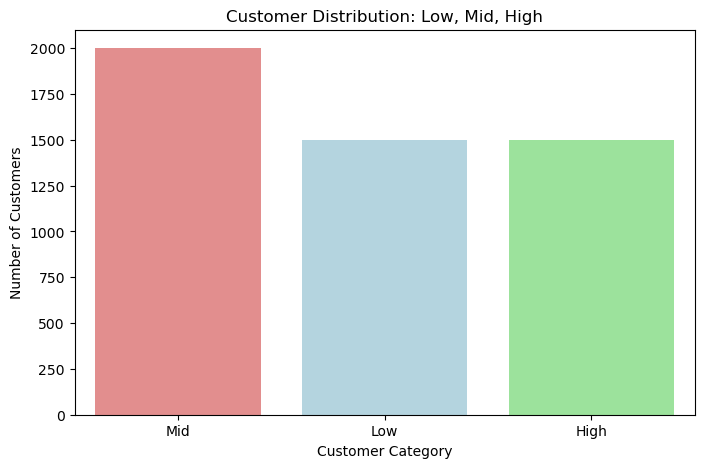

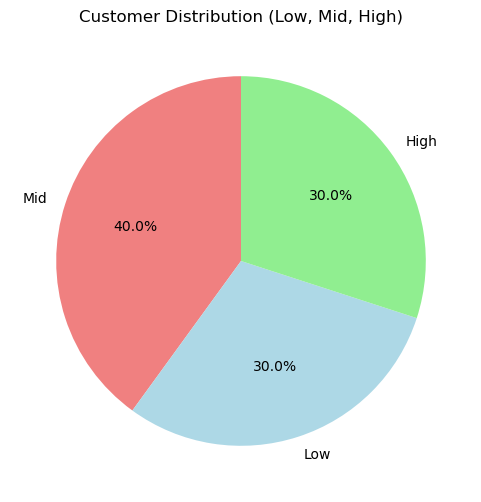

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("customers_labeled.csv", encoding='utf-8')  # Adjust path if needed

# Count the number of customers in each category
customer_counts = df['Customer_Label'].value_counts()

# Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=customer_counts.index, y=customer_counts.values, palette=['lightcoral', 'lightblue', 'lightgreen'])
plt.xlabel("Customer Category")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution: Low, Mid, High")
plt.show()

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title("Customer Distribution (Low, Mid, High)")
plt.show()


In [6]:
import pandas as pd
from sklearn.cluster import KMeans

# Load data
try:
    df = pd.read_csv("customers.csv", encoding='utf-8')
except UnicodeDecodeError:
    # Try alternative encodings if UTF-8 fails
    try:
        df = pd.read_csv("customers.csv", encoding='latin1')
    except UnicodeDecodeError:
        df = pd.read_csv("customers.csv", encoding='ISO-8859-1')

# Task 2: Shopping Pattern Analysis
def task2_shopping_patterns(df):
    # Pattern 1: City-wise spending
    city_stats = df.groupby('city').agg({
        'monetary': 'mean',  # Average spending per city
        'frequency': 'mean',  # Average frequency per city
        'customer_id': 'count'  # Total customers per city
    }).rename(columns={'customer_id': 'total_customers'})

    # Pattern 2: Gender differences
    gender_stats = df.groupby('gender').agg({
        'monetary': 'mean',  # Average spending per gender
        'frequency': 'mean'  # Average frequency per gender
    })

    # Pattern 3: Cluster analysis (using K-means)
    # Prepare data for clustering
    X = df[['frequency', 'monetary']]  # Features for clustering
    kmeans = KMeans(n_clusters=3, random_state=42)  # Create 3 clusters
    df['cluster'] = kmeans.fit_predict(X)  # Assign cluster labels to customers

    return city_stats, gender_stats, df[['customer_id', 'cluster']]

# Run Task 2
city_stats, gender_stats, clusters = task2_shopping_patterns(df)

# Display results as dataframes
city_stats, gender_stats, clusters.head()




(                monetary  frequency  total_customers
 city                                                
 Ahmedabad    6017.822602   9.829918              488
 Bangalore    6027.519809   9.839695              524
 Bhubaneswar  5861.347560   9.762000              500
 Chandigarh   5984.205241   9.985944              498
 Chennai      6053.566716  10.092251              542
 Delhi        6638.326611  10.079002              481
 Guwahati     6037.005210  10.331337              501
 Imphal       6116.384950  10.027944              501
 Kolkata      6012.496848   9.895616              479
 Mumbai       6147.655679  10.154321              486,
            monetary  frequency
 gender                        
 F       6101.524996  10.018695
 M       6070.259239   9.977553,
    customer_id  cluster
 0       570586        1
 1       294484        2
 2       669686        1
 3       607103        2
 4       633928        1)

In [7]:
# Task 3: Age Group Analysis
def task3_age_group_analysis(df):
    # Create age groups
    bins = [18, 25, 35, 45, 55, 100]
    labels = ['18-24', '25-34', '35-44', '45-54', '55+']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

    # Analyze spending by age group
    age_stats = df.groupby('age_group').agg({
        'monetary': ['mean', 'sum'],
        'frequency': 'mean',
        'customer_id': 'count'
    }).rename(columns={'customer_id': 'total_customers'})

    return age_stats

# Run Task 3
age_stats = task3_age_group_analysis(df)
print("\nSpending by Age Group:\n", age_stats)


Spending by Age Group:
               monetary              frequency total_customers
                  mean         sum       mean           count
age_group                                                    
18-24      6187.484751  6224609.66  10.086481            1006
25-34      6165.688856  9433503.95  10.142484            1530
35-44      5972.545883  8994654.10   9.889110            1506
45-54      6023.696721  4427417.09   9.873469             735
55+        6082.530852  1356404.38   9.798206             223


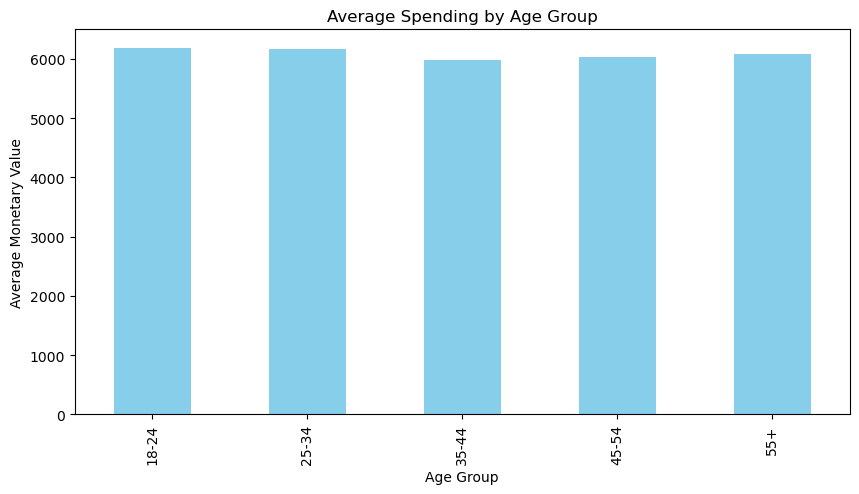

In [8]:
import matplotlib.pyplot as plt

# Visualize Age Group Spending
plt.figure(figsize=(10, 5))
df.groupby('age_group')['monetary'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Monetary Value')
plt.show()

Spending by Age Group:
               monetary              frequency total_customers
                  mean         sum       mean           count
age_group                                                    
18-24      6187.484751  6224609.66  10.086481            1006
25-34      6165.688856  9433503.95  10.142484            1530
35-44      5972.545883  8994654.10   9.889110            1506
45-54      6023.696721  4427417.09   9.873469             735
55+        6082.530852  1356404.38   9.798206             223


<Figure size 1000x600 with 0 Axes>

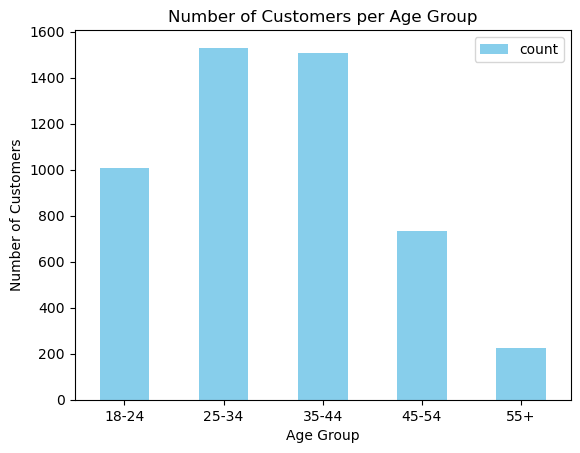

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
try:
    df = pd.read_csv("customers.csv", encoding='utf-8')
except UnicodeDecodeError:
    # Try alternative encodings if UTF-8 fails
    try:
        df = pd.read_csv("customers.csv", encoding='latin1')
    except UnicodeDecodeError:
        df = pd.read_csv("customers.csv", encoding='ISO-8859-1')

# Task 3: Age Group Analysis
def task3_age_group_analysis(df):
    # Create age groups
    bins = [18, 25, 35, 45, 55, 100]
    labels = ['18-24', '25-34', '35-44', '45-54', '55+']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

    # Analyze spending by age group
    age_stats = df.groupby('age_group').agg({
        'monetary': ['mean', 'sum'],  # Average and total spending
        'frequency': 'mean',          # Average frequency
        'customer_id': 'count'        # Total customers per age group
    }).rename(columns={'customer_id': 'total_customers'})

    return age_stats

# Run Task 3
age_stats = task3_age_group_analysis(df)

# Display age group stats
print("Spending by Age Group:\n", age_stats)

# Visualize customer count per age group
plt.figure(figsize=(10, 6))
age_stats['total_customers'].plot(kind='bar', color='skyblue')
plt.title('Number of Customers per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

In [10]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("customers_labeled.csv")

# Define churn scoring based on quantiles
df['Recency_Score'] = pd.qcut(df['recency'], q=3, labels=[3, 2, 1])  # Higher recency = lower score
df['Frequency_Score'] = pd.qcut(df['frequency'], q=3, labels=[1, 2, 3])  # Lower frequency = lower score
df['Monetary_Score'] = pd.qcut(df['monetary'], q=3, labels=[1, 2, 3])  # Lower spending = lower score

# Calculate Churn Score (lower score = high churn risk)
df['Churn_Score'] = df['Recency_Score'].astype(int) + df['Frequency_Score'].astype(int) + df['Monetary_Score'].astype(int)

# Categorize churn risk
def churn_risk(score):
    if score >= 5:
        return "Active"
    elif 4 <= score < 5:
        return "At Risk"
    else:
        return "Churned"

df['Churn_Status'] = df['Churn_Score'].apply(churn_risk)

# Save results
df.to_csv("customer_churn_analysis.csv", index=False)

# Return churn summary as DataFrame
churn_summary = df[['customer_id', 'name', 'Churn_Status']]

# Churn percentage as DataFrame
churn_rate = df['Churn_Status'].value_counts(normalize=True) * 100

# Combine both results into a single DataFrame
final_df = churn_summary.copy()
final_df['Churn_Rate'] = final_df['Churn_Status'].map(churn_rate)

final_df


,customer_id,name,Churn_Status,Churn_Rate
0,570586,Falak Kanda,Active,71.76
1,294484,Meera Parekh,Active,71.76
2,669686,Manya Chad,At Risk,15.26
3,607103,Fitan Desai,Active,71.76
4,633928,Hemal Pandey,Active,71.76
...,...,...,...,...
4995,574543,Yochana Chokshi,Active,71.76
4996,819960,Chanakya Kunda,Active,71.76
4997,826341,Anusha Subramanian,At Risk,15.26
4998,585488,Abhiram Balay,Active,71.76


In [11]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("customers_labeled.csv")

# Define churn scoring based on quantiles
df['Recency_Score'] = pd.qcut(df['recency'], q=3, labels=[3, 2, 1])  # Higher recency = lower score
df['Frequency_Score'] = pd.qcut(df['frequency'], q=3, labels=[1, 2, 3])  # Lower frequency = lower score
df['Monetary_Score'] = pd.qcut(df['monetary'], q=3, labels=[1, 2, 3])  # Lower spending = lower score

# Calculate Churn Score (lower score = high churn risk)
df['Churn_Score'] = df['Recency_Score'].astype(int) + df['Frequency_Score'].astype(int) + df['Monetary_Score'].astype(int)

# Categorize churn risk
def churn_risk(score):
    if score >= 5:
        return "Active"
    elif 4 <= score < 5:
        return "At Risk"
    else:
        return "Churned"

df['Churn_Status'] = df['Churn_Score'].apply(churn_risk)

# Save results
df.to_csv("customer_churn_analysis.csv", index=False)

# Display the churn analysis dataframe
df[['customer_id', 'name', 'Churn_Status']]

# Churn percentage
churn_rate = df['Churn_Status'].value_counts(normalize=True) * 100
print("\nChurn Rate:\n", churn_rate)



Churn Rate:
 Active     71.76
At Risk    15.26
Churned    12.98
Name: Churn_Status, dtype: float64


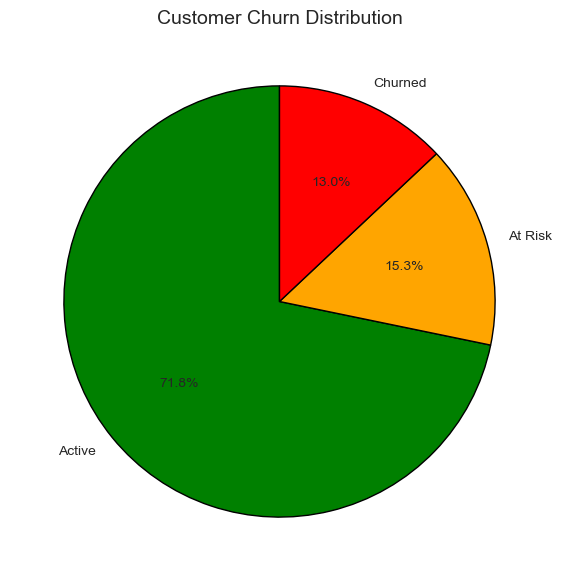

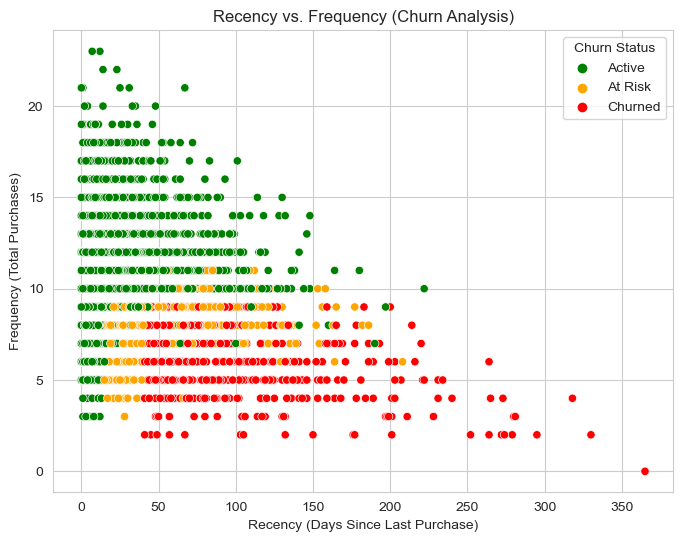

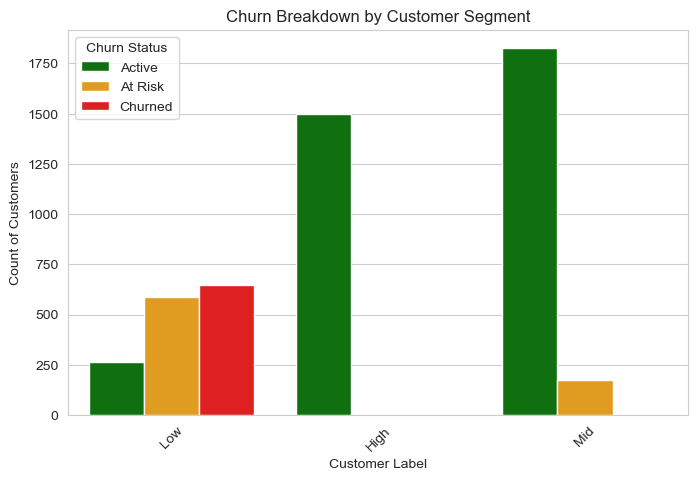

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load analyzed churn dataset
df = pd.read_csv("customer_churn_analysis.csv")

# Set style
sns.set_style("whitegrid")

# Churn Distribution - Pie Chart
plt.figure(figsize=(7, 7))
df["Churn_Status"].value_counts().plot.pie(autopct="%1.1f%%", colors=["green", "orange", "red"],
                                           startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Customer Churn Distribution", fontsize=14)
plt.ylabel("")  # Hide y-label
plt.show()

# Recency vs. Frequency - Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["recency"], y=df["frequency"], hue=df["Churn_Status"], palette={"Active": "green", "At Risk": "orange", "Churned": "red"})
plt.title("Recency vs. Frequency (Churn Analysis)")
plt.xlabel("Recency (Days Since Last Purchase)")
plt.ylabel("Frequency (Total Purchases)")
plt.legend(title="Churn Status")
plt.show()

# Churn Breakdown by Customer Label - Bar Chart
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Customer_Label", hue="Churn_Status", palette={"Active": "green", "At Risk": "orange", "Churned": "red"})
plt.title("Churn Breakdown by Customer Segment")
plt.xlabel("Customer Label")
plt.ylabel("Count of Customers")
plt.xticks(rotation=45)
plt.legend(title="Churn Status")
plt.show()


In [13]:
pip install pandas numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load Dataset
df = pd.read_csv("customers_labeled.csv")  # Change filename accordingly

# Debugging: Ensure necessary columns exist
required_cols = {'customer_id', 'name', 'recency', 'frequency', 'monetary', 'Customer_Label'}
if not required_cols.issubset(df.columns):
    missing = required_cols - set(df.columns)
    print(f"❌ ERROR: Missing columns: {missing}")
    exit()

# Rule-Based NBA Function
def rule_based_nba(row):
    if row['Customer_Label'] == 'High':
        return 'vip_loyalty_bonus'
    elif row['Customer_Label'] == 'Mid':
        return 'general_10%_discount'
    elif row['Customer_Label'] == 'Low':
        return 'reactivation_email_20%_off'
    else:
        return 'no_action'

df['rule_based_action'] = df.apply(rule_based_nba, axis=1)

# Debugging: Check Rule-Based Actions
print("Rule-Based Actions Distribution:\n", df['rule_based_action'].value_counts())

# Prepare Data for ML-Based NBA
features = ['recency', 'frequency', 'monetary']
target = 'rule_based_action'

# Debugging: Check if features have valid data
print("Feature Summary:\n", df[features].describe())

# Encode categorical target variable
encoder = LabelEncoder()
df['rule_based_action_encoded'] = encoder.fit_transform(df['rule_based_action'])

# Train Decision Tree Model
X = df[features]
y = df['rule_based_action_encoded']
model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
model.fit(X, y)

# Generate ML-Based Recommendations
df['ml_based_action_encoded'] = model.predict(X)
df['ml_based_action'] = encoder.inverse_transform(df['ml_based_action_encoded'])

# Determine Final Recommendation
def final_recommendation(row):
    if row['rule_based_action'] == row['ml_based_action']:
        return row['rule_based_action']
    else:
        return f"ml_override_{row['ml_based_action']}"

df['final_recommendation'] = df.apply(final_recommendation, axis=1)

# Save Final Recommendations
df[['customer_id', 'name', 'rule_based_action', 'ml_based_action', 'final_recommendation']].to_csv("final_nba_output.csv", index=False)

print("✅ NBA applied successfully. Results saved in 'final_nba_output.csv'")




Rule-Based Actions Distribution:
 general_10%_discount          2000
reactivation_email_20%_off    1500
vip_loyalty_bonus             1500
Name: rule_based_action, dtype: int64
Feature Summary:
            recency    frequency      monetary
count  5000.000000  5000.000000   5000.000000
mean     35.891600    10.000000   6087.317836
std      38.580974     3.161645   2487.262165
min       0.000000     0.000000      0.000000
25%      10.000000     8.000000   4256.645000
50%      24.000000    10.000000   5902.380000
75%      49.000000    12.000000   7605.112500
max     365.000000    23.000000  20866.040000
✅ NBA applied successfully. Results saved in 'final_nba_output.csv'


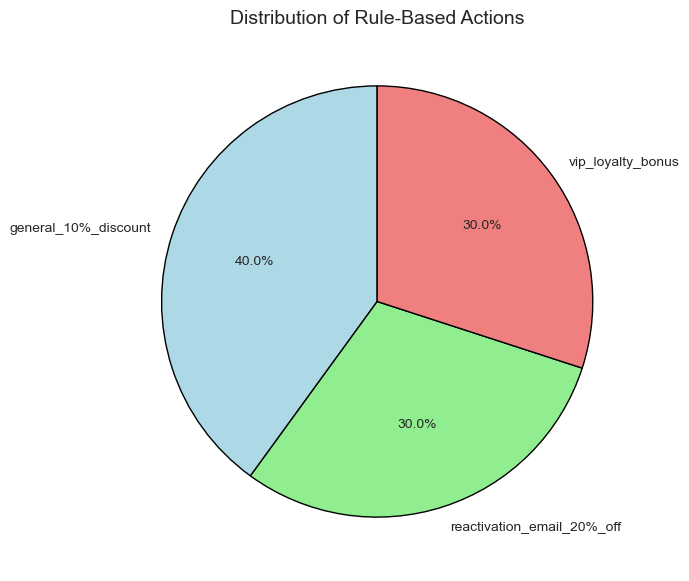

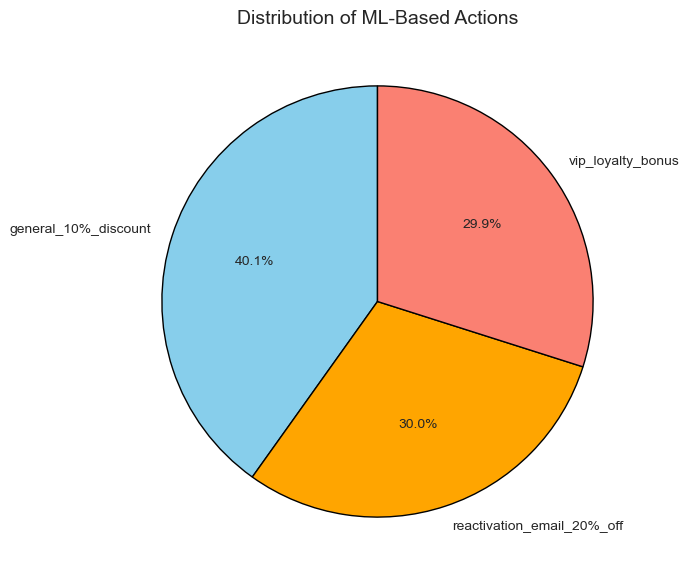

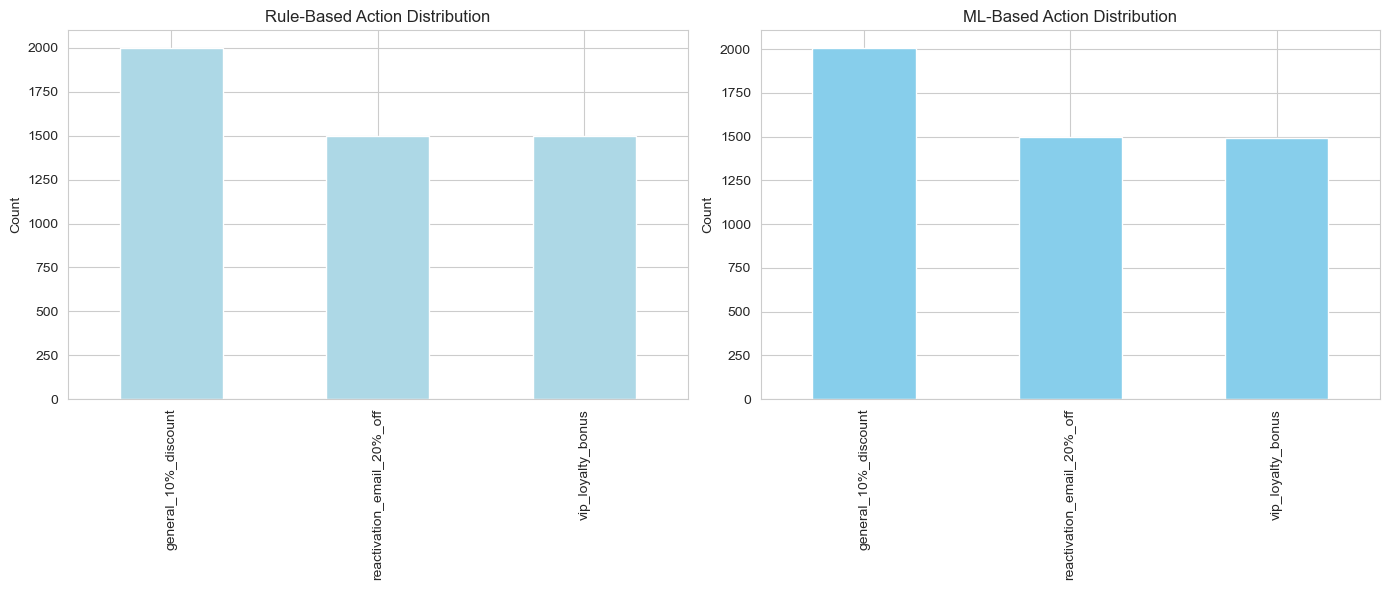

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's the output from your NBA code)
df = pd.read_csv("final_nba_output.csv")

# Plot a Pie chart to show distribution of rule-based and ML-based actions
plt.figure(figsize=(7, 7))
df['rule_based_action'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightgoldenrodyellow'],
                                                 startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Rule-Based Actions', fontsize=14)
plt.ylabel('')  # Remove y-axis label
plt.show()

# Plot a Pie chart to show ML-based action distribution
plt.figure(figsize=(7, 7))
df['ml_based_action'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'orange', 'salmon', 'yellowgreen'],
                                              startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of ML-Based Actions', fontsize=14)
plt.ylabel('')  # Remove y-axis label
plt.show()

# Alternatively, a Bar chart for a side-by-side comparison of both action distributions
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

df['rule_based_action'].value_counts().plot(kind='bar', ax=ax[0], color='lightblue')
ax[0].set_title('Rule-Based Action Distribution')
ax[0].set_ylabel('Count')

df['ml_based_action'].value_counts().plot(kind='bar', ax=ax[1], color='skyblue')
ax[1].set_title('ML-Based Action Distribution')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [19]:
# Compare Rule-Based Actions vs ML-Based Predictions and highlight where they differ
df_comparison = df[['customer_id', 'name', 'rule_based_action', 'ml_based_action']]

# Mark where the actions differ
df_comparison['action_difference'] = df_comparison['rule_based_action'] != df_comparison['ml_based_action']

# Display the comparison table
print("\nComparison of Rule-Based vs ML-Based Actions:\n", df_comparison)

# Save the comparison to a CSV
df_comparison.to_csv("nba_comparison.csv", index=False)

# Optional: Display a sample of the comparison (first 10 rows)
df_comparison.head(10)



Comparison of Rule-Based vs ML-Based Actions:
       customer_id                name           rule_based_action  \
0          570586         Falak Kanda  reactivation_email_20%_off   
1          294484        Meera Parekh           vip_loyalty_bonus   
2          669686          Manya Chad  reactivation_email_20%_off   
3          607103         Fitan Desai           vip_loyalty_bonus   
4          633928        Hemal Pandey  reactivation_email_20%_off   
...           ...                 ...                         ...   
4995       574543     Yochana Chokshi           vip_loyalty_bonus   
4996       819960      Chanakya Kunda        general_10%_discount   
4997       826341  Anusha Subramanian  reactivation_email_20%_off   
4998       585488       Abhiram Balay           vip_loyalty_bonus   
4999       347450       Reyansh Koshy           vip_loyalty_bonus   

                 ml_based_action  action_difference  
0     reactivation_email_20%_off              False  
1              

,customer_id,name,rule_based_action,ml_based_action,action_difference
0,570586,Falak Kanda,reactivation_email_20%_off,reactivation_email_20%_off,False
1,294484,Meera Parekh,vip_loyalty_bonus,vip_loyalty_bonus,False
2,669686,Manya Chad,reactivation_email_20%_off,reactivation_email_20%_off,False
3,607103,Fitan Desai,vip_loyalty_bonus,vip_loyalty_bonus,False
4,633928,Hemal Pandey,reactivation_email_20%_off,reactivation_email_20%_off,False
5,594203,Omya Pandya,vip_loyalty_bonus,vip_loyalty_bonus,False
6,461760,Gaurangi Kapur,general_10%_discount,general_10%_discount,False
7,315395,Qarin Gola,reactivation_email_20%_off,reactivation_email_20%_off,False
8,709779,Harshil Shere,reactivation_email_20%_off,reactivation_email_20%_off,False
9,724055,Jeet Luthra,vip_loyalty_bonus,vip_loyalty_bonus,False
